In [4]:
!pip install mysql-connector-python 

In [5]:
import mysql.connector


conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="@21Wahal",
    database="olist_project"
)

print("Connected successfully")


Connected successfully


In [6]:
import pandas as pd
querry='select * from customer_analytics'
df=pd.read_sql(querry,conn)
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_11504\272812206.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(querry,conn)


,customer_id,total_orders,total_revenue,avg_order_value
0,48ed31e735f1c420ed6ca3637b7c744d,1,112.71,112.71
1,366c88e3ee5ed365c8529a9639c8b91c,1,61.38,61.38
2,411373e81bbd24b0356ca1274e9c03fe,1,266.69,266.69
3,71cd7e5e11ae80ed42c6c57ff51a347d,1,37.09,37.09
4,a666bb7a77916be2716fa1420c73c56f,2,40.56,20.28


In [7]:
df.shape

(98666, 4)

In [8]:
df.describe

<bound method NDFrame.describe of                             customer_id  total_orders  total_revenue  \
0      48ed31e735f1c420ed6ca3637b7c744d             1         112.71   
1      366c88e3ee5ed365c8529a9639c8b91c             1          61.38   
2      411373e81bbd24b0356ca1274e9c03fe             1         266.69   
3      71cd7e5e11ae80ed42c6c57ff51a347d             1          37.09   
4      a666bb7a77916be2716fa1420c73c56f             2          40.56   
...                                 ...           ...            ...   
98661  c89e1a69a9e065fefa96df80fc49c666             1         120.39   
98662  ee3a81b2771fec5f9e982cdb1b3a4804             1          59.78   
98663  bd33c2c896c5ff73c205660af316b420             1         133.96   
98664  4bf8f2a0187cada294f054af193475e7             1         111.53   
98665  5c8f393ae866c2a2d2e775dbc2409a59             3         617.25   

       avg_order_value  
0               112.71  
1                61.38  
2               266.69  
3

In [9]:
df.columns

Index(['customer_id', 'total_orders', 'total_revenue', 'avg_order_value'], dtype='object')

In [10]:
df.isnull

<bound method DataFrame.isnull of                             customer_id  total_orders  total_revenue  \
0      48ed31e735f1c420ed6ca3637b7c744d             1         112.71   
1      366c88e3ee5ed365c8529a9639c8b91c             1          61.38   
2      411373e81bbd24b0356ca1274e9c03fe             1         266.69   
3      71cd7e5e11ae80ed42c6c57ff51a347d             1          37.09   
4      a666bb7a77916be2716fa1420c73c56f             2          40.56   
...                                 ...           ...            ...   
98661  c89e1a69a9e065fefa96df80fc49c666             1         120.39   
98662  ee3a81b2771fec5f9e982cdb1b3a4804             1          59.78   
98663  bd33c2c896c5ff73c205660af316b420             1         133.96   
98664  4bf8f2a0187cada294f054af193475e7             1         111.53   
98665  5c8f393ae866c2a2d2e775dbc2409a59             3         617.25   

       avg_order_value  
0               112.71  
1                61.38  
2               266.69  
3

In [11]:
import matplotlib.pyplot as plt

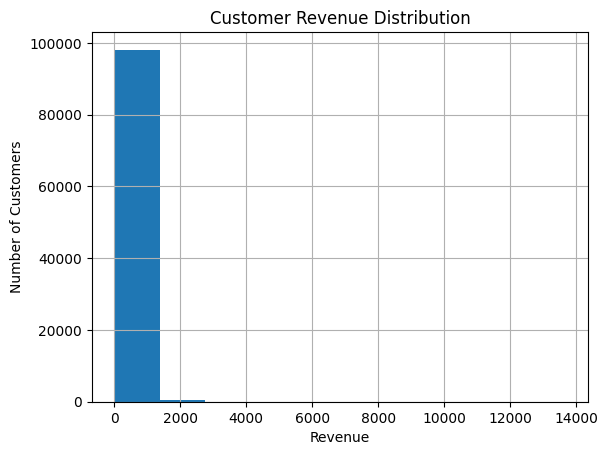

In [12]:
df.hist(['total_revenue'])
plt.title('Customer Revenue Distribution')
plt.xlabel("Revenue")
plt.ylabel("Number of Customers")
plt.show()

In [13]:
df[df['total_revenue'] > 5000].shape


(6, 4)

In [14]:
df[df['total_revenue'] < 500].shape


(94433, 4)

In [15]:
df["customer_segment"]=pd.cut(df['total_revenue'], bins=[0, 500, 2000, 15000],labels=['Low', 'Medium', 'High'])

In [16]:
df['customer_segment'].value_counts()


customer_segment
Low       94433
Medium     4024
High        209
Name: count, dtype: int64

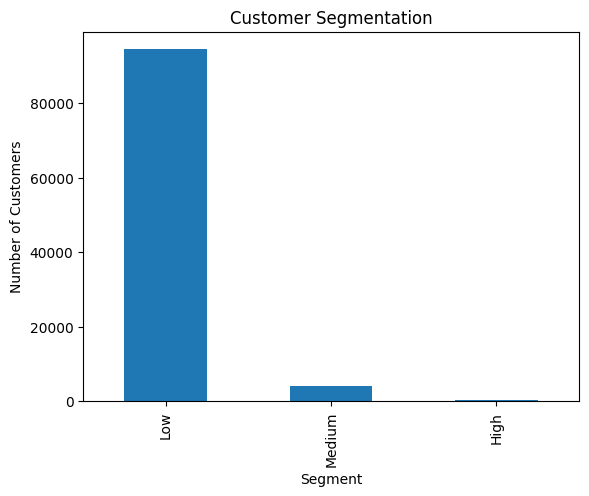

In [17]:
df['customer_segment'].value_counts().plot(kind='bar')
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


In [18]:
df.groupby('customer_segment')['total_orders'].mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_11504\2444159671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('customer_segment')['total_orders'].mean()


customer_segment
Low       1.127477
Medium    1.449553
High      1.655502
Name: total_orders, dtype: float64

In [19]:
df['recency_score'] = df['total_orders'].apply(lambda x: 'High' if x > 2 else 'Low')

df.head()


,customer_id,total_orders,total_revenue,avg_order_value,customer_segment,recency_score
0,48ed31e735f1c420ed6ca3637b7c744d,1,112.71,112.71,Low,Low
1,366c88e3ee5ed365c8529a9639c8b91c,1,61.38,61.38,Low,Low
2,411373e81bbd24b0356ca1274e9c03fe,1,266.69,266.69,Low,Low
3,71cd7e5e11ae80ed42c6c57ff51a347d,1,37.09,37.09,Low,Low
4,a666bb7a77916be2716fa1420c73c56f,2,40.56,20.28,Low,Low


In [20]:
df['churn_risk'] = df.apply(lambda row: 'High' if row['total_orders'] <= 1 and row['total_revenue'] < 500 else 'Low',
    axis=1
)

df.head()


,customer_id,total_orders,total_revenue,avg_order_value,customer_segment,recency_score,churn_risk
0,48ed31e735f1c420ed6ca3637b7c744d,1,112.71,112.71,Low,Low,High
1,366c88e3ee5ed365c8529a9639c8b91c,1,61.38,61.38,Low,Low,High
2,411373e81bbd24b0356ca1274e9c03fe,1,266.69,266.69,Low,Low,High
3,71cd7e5e11ae80ed42c6c57ff51a347d,1,37.09,37.09,Low,Low,High
4,a666bb7a77916be2716fa1420c73c56f,2,40.56,20.28,Low,Low,Low


In [21]:
df['churn_risk'].value_counts()


churn_risk
High    85450
Low     13216
Name: count, dtype: int64

In [23]:
ml_df = df[['total_orders', 'total_revenue', 'avg_order_value', 'churn_risk']]

ml_df.head()


,total_orders,total_revenue,avg_order_value,churn_risk
0,1,112.71,112.71,High
1,1,61.38,61.38,High
2,1,266.69,266.69,High
3,1,37.09,37.09,High
4,2,40.56,20.28,Low


In [24]:
ml_df['churn_risk']=df['churn_risk'].map({'Low':0, 'High':1})

C:\Users\HP\AppData\Local\Temp\ipykernel_11504\2597933400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['churn_risk']=df['churn_risk'].map({'Low':0, 'High':1})


In [25]:
ml_df.head()

,total_orders,total_revenue,avg_order_value,churn_risk
0,1,112.71,112.71,1
1,1,61.38,61.38,1
2,1,266.69,266.69,1
3,1,37.09,37.09,1
4,2,40.56,20.28,0


In [26]:
X = ml_df[['total_orders', 'total_revenue', 'avg_order_value']]
y = ml_df['churn_risk']


In [27]:
from sklearn.model_selection import train_test_split

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
pred = model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pred)

0.9999493260362825

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)


array([[ 2584,     0],
       [    1, 17149]])

In [37]:
X_test['predicted_churn'] = pred

churn_customers = X_test[X_test['predicted_churn'] == 1]

churn_customers = churn_customers.merge(
    df[['customer_id']],
    left_index=True,
    right_index=True
)

churn_customers.head()


,total_orders,total_revenue,avg_order_value,predicted_churn,customer_id
19325,1,206.68,206.68,1,800282b8afaaf9ed8bb6ed9adcf83e61
34714,1,108.21,108.21,1,dcfbac644e59e62debeeb913cc70cb66
25856,1,139.03,139.03,1,26d283dae44fbc9eee874cecca589853
37240,1,35.38,35.38,1,9fef7c7ffc4421952c01aafb68394c53
18664,1,163.43,163.43,1,228197f0dbebc485b65d117dee5bc7d5
